In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import Normalizer,StandardScaler,LabelEncoder

In [18]:
df=pd.read_csv('Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df.shape

(891, 12)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

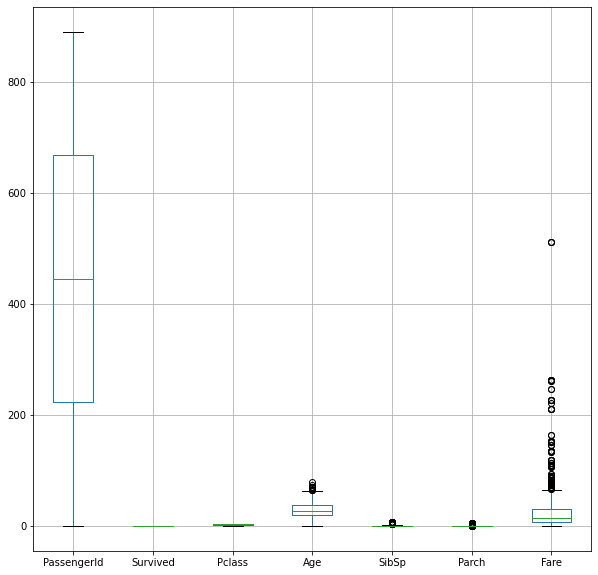

In [23]:
df.boxplot(figsize=(10,10))

In [26]:
df['Age'].fillna(df['Age'].mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [32]:
df['Cabin']=df['Cabin'].fillna('C12')


In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C12,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C12,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C12,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C12,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C12,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C12,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C12,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C12,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [35]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [37]:
df['Embarked']=df['Embarked'].fillna('D')

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C12,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C12,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C12,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C12,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [39]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [66]:
lab_enc=LabelEncoder()

In [67]:
df['Sex']=lab_enc.fit_transform(df[['Sex']])
df['Sex']

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [68]:
target=df['Sex']
target

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [53]:
feature=df.drop(['Sex','Name','Ticket','Cabin','Embarked'],axis=1)
feature

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [69]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=100)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


# XGBM:

In [71]:
import xgboost as xgb

In [72]:
xgboost=xgb.XGBClassifier(n_estimators=50,min_child_weight=2,max_depth=3,learning_rate=0.3)

In [73]:
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
y_pred=xgboost.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred)

0.7486033519553073

<AxesSubplot:xlabel='Fare', ylabel='Count'>

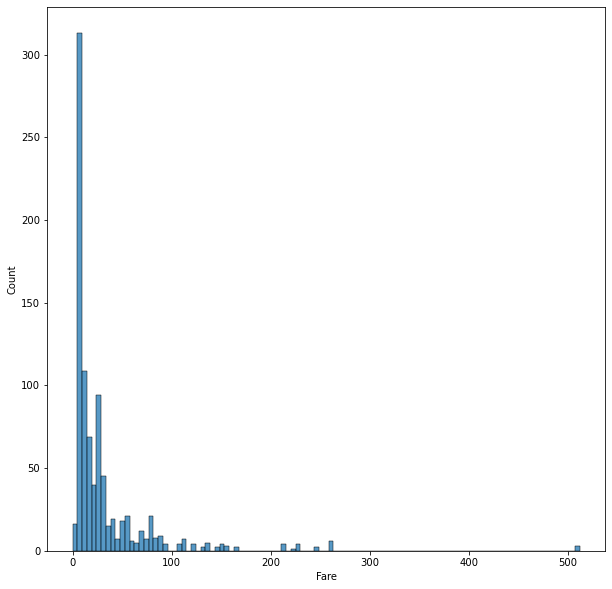

In [79]:
plt.figure(figsize=(10,10))
sns.histplot(df['Fare'])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

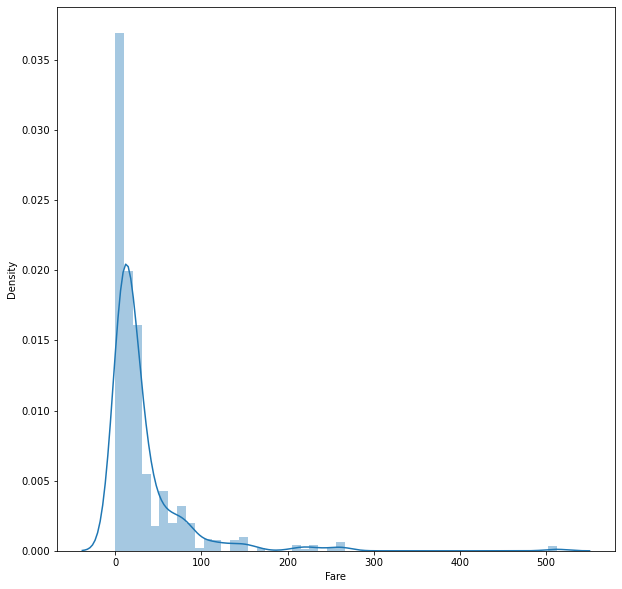

In [80]:
plt.figure(figsize=(10,10))
sns.distplot(df['Fare'])

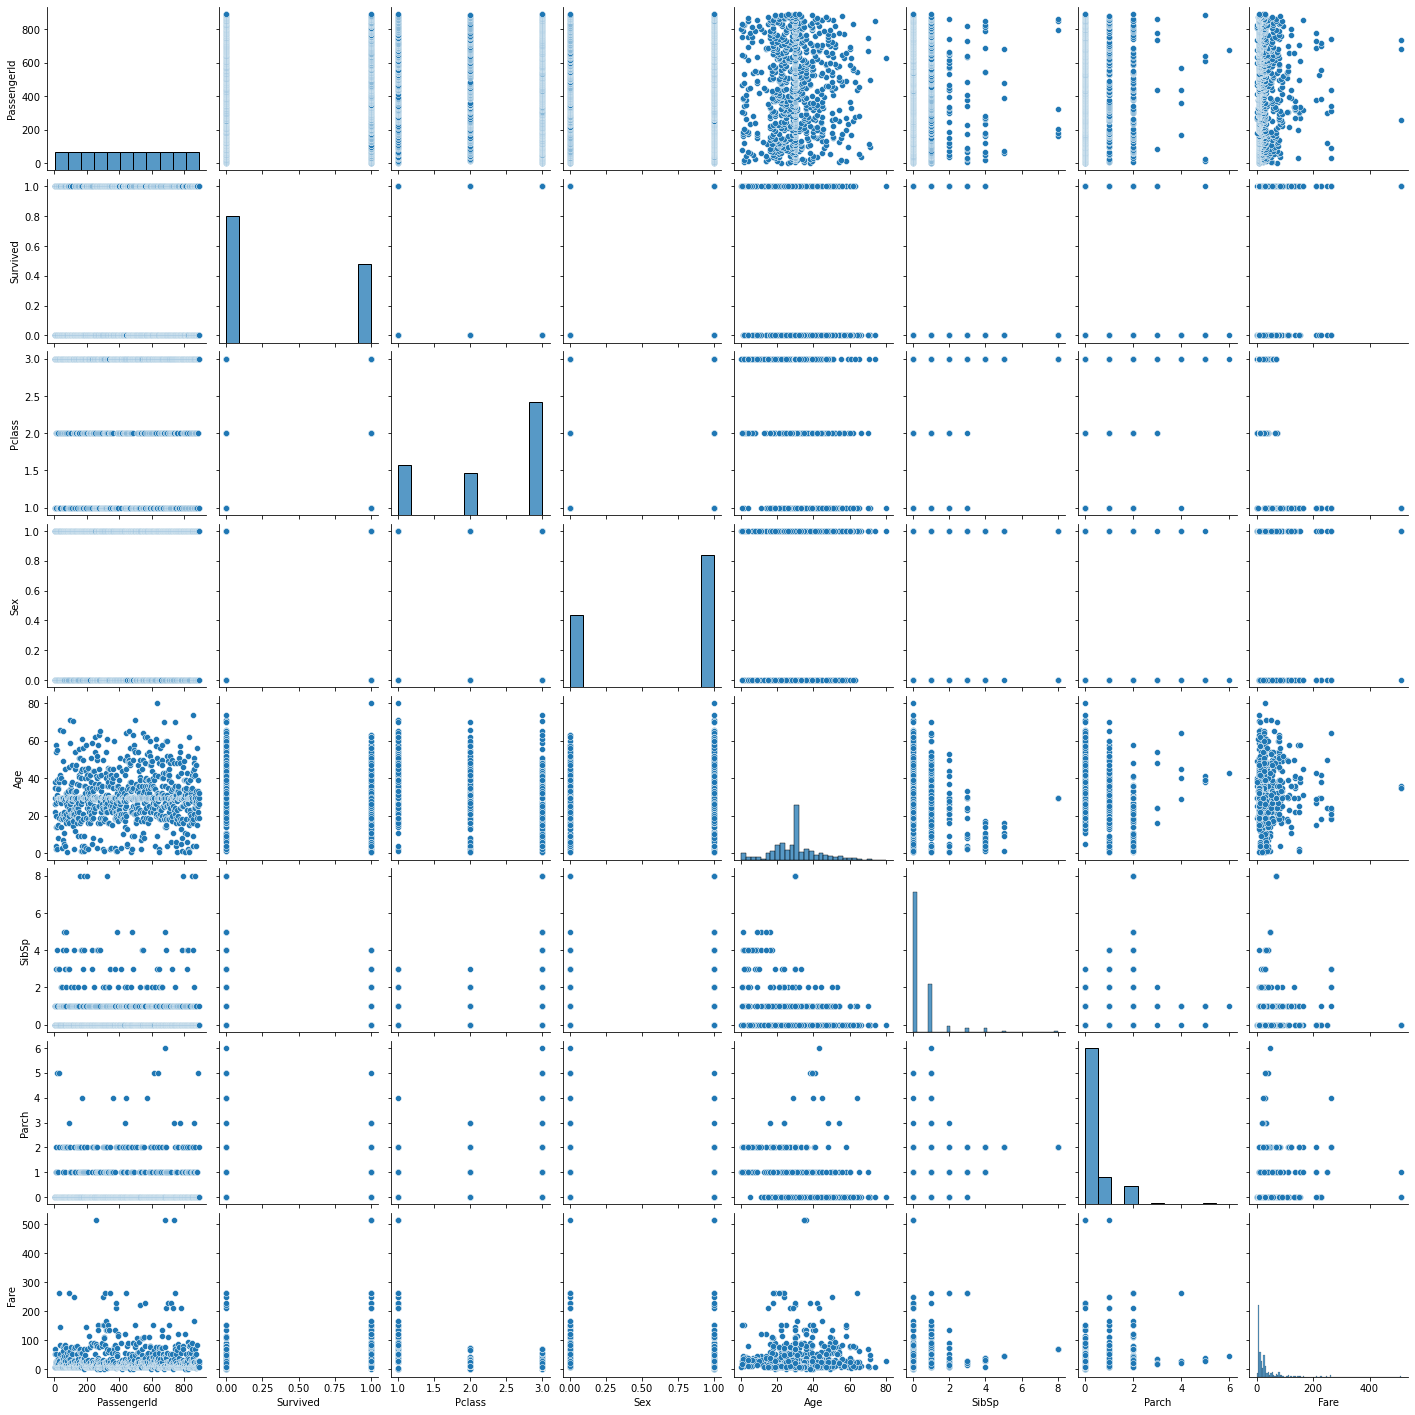

In [81]:
sns.pairplot(data=df)

<AxesSubplot:>

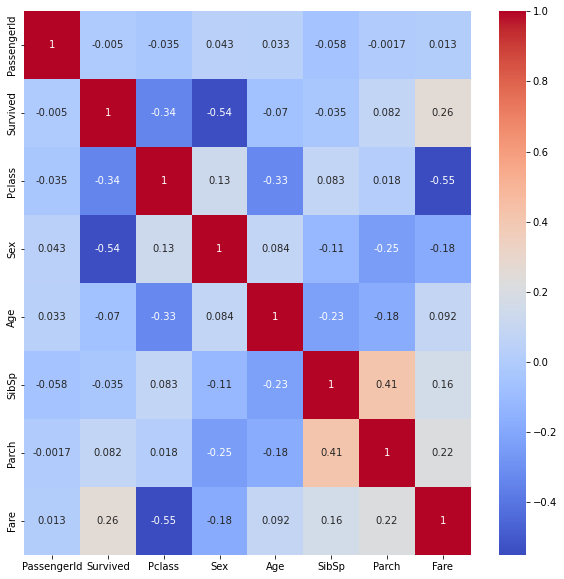

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# LGBM:

In [90]:
import lightgbm as lgb

In [91]:
lgboost=lgb.LGBMClassifier(n_estimators=60,min_child_weight=3,max_depth=2,learning_rate=0.2)

In [92]:
lgboost.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 467, number of negative: 245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.655899 -> initscore=0.645071
[LightGBM] [Info] Start training from score 0.645071
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier(learning_rate=0.2, max_depth=2, min_child_weight=3,
               n_estimators=60)

In [94]:
y_pred1=lgboost.predict(x_test)

In [95]:
accuracy_score(y_test,y_pred1)

0.7541899441340782

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64        69
           1       0.76      0.85      0.81       110

    accuracy                           0.75       179
   macro avg       0.74      0.72      0.72       179
weighted avg       0.74      0.75      0.74       179



In [97]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        69
           1       0.76      0.87      0.81       110

    accuracy                           0.75       179
   macro avg       0.75      0.72      0.73       179
weighted avg       0.75      0.75      0.75       179



{'whiskers': [<matplotlib.lines.Line2D at 0x1644b684190>,
 'caps': [<matplotlib.lines.Line2D at 0x1644b684730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1644b678e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1644b684cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1644b684f40>],
 'means': []}

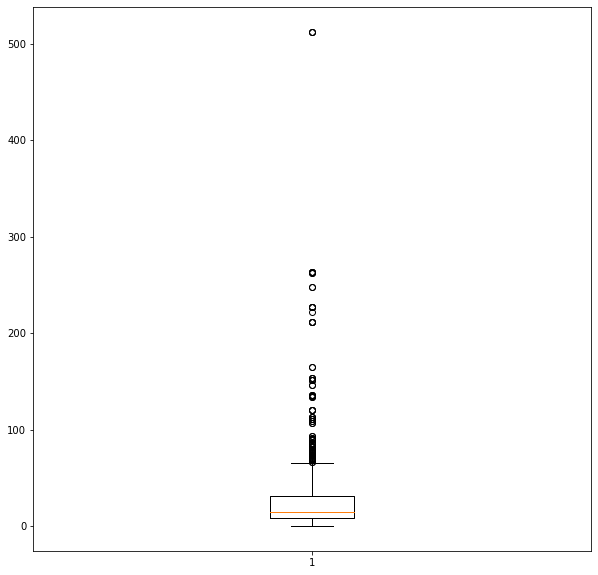

In [100]:
plt.figure(figsize=(10,10))
plt.boxplot(df['Fare'])

In [102]:
Q1=df['Fare'].quantile(0.25)
Q1

7.9104

In [103]:
Q3=df['Fare'].quantile(0.75)
Q3

31.0

In [104]:
IQR=Q3-Q1
IQR

23.0896

In [105]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [106]:
outliers=df[(df.Fare<lower) | (df.Fare>upper)]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",1,28.000000,1,0,PC 17604,82.1708,C12,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",1,29.699118,8,2,CA. 2343,69.5500,C12,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",0,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",0,45.000000,1,1,36928,164.8667,C12,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,29.699118,8,2,CA. 2343,69.5500,C12,S


# Titanic_Test:

In [107]:
df1=pd.read_csv('Titanic_test.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [108]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [109]:
df1.duplicated().sum()

0

In [114]:
lab1_enc=LabelEncoder()

In [115]:
df1['Sex']=lab1_enc.fit_transform(df1['Sex'])

In [116]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [122]:
df1['Age']=df1['Age'].fillna(df1['Age'].mean())
df1['Cabin']=df1['Cabin'].fillna('P2605')
df1['Fare']=df1['Fare'].fillna(df1['Fare'].median())

In [123]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,P2605,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,P2605,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,P2605,Q
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,P2605,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,P2605,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,P2605,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,P2605,S
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,P2605,S


In [124]:
df1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [128]:
target1=df1[['Sex']]
target1

,Sex
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [127]:
feature1=df1.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)
feature1

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50000,0,0,7.8292
1,893,3,47.00000,1,0,7.0000
2,894,2,62.00000,0,0,9.6875
3,895,3,27.00000,0,0,8.6625
4,896,3,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500
414,1306,1,39.00000,0,0,108.9000
415,1307,3,38.50000,0,0,7.2500
416,1308,3,30.27259,0,0,8.0500


In [129]:
x_train,x_test,y_train,y_test=train_test_split(feature1,target1,train_size=0.80,random_state=100)

In [130]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 6)
(84, 6)
(334, 1)
(84, 1)


# XGBM:

In [131]:
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
y_pred2=xgboost.predict(x_test)

In [133]:
accuracy_score(y_test,y_pred2)

0.6309523809523809

In [134]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.52      0.38      0.44        32
           1       0.67      0.79      0.73        52

    accuracy                           0.63        84
   macro avg       0.60      0.58      0.58        84
weighted avg       0.61      0.63      0.62        84



# LGBM:

In [136]:
lgboost.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640719 -> initscore=0.578484
[LightGBM] [Info] Start training from score 0.578484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(learning_rate=0.2, max_depth=2, min_child_weight=3,
               n_estimators=60)

In [137]:
y_pred3=lgboost.predict(x_test)

In [138]:
accuracy_score(y_test,y_pred3)

0.5952380952380952

In [139]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.45      0.28      0.35        32
           1       0.64      0.79      0.71        52

    accuracy                           0.60        84
   macro avg       0.55      0.53      0.53        84
weighted avg       0.57      0.60      0.57        84



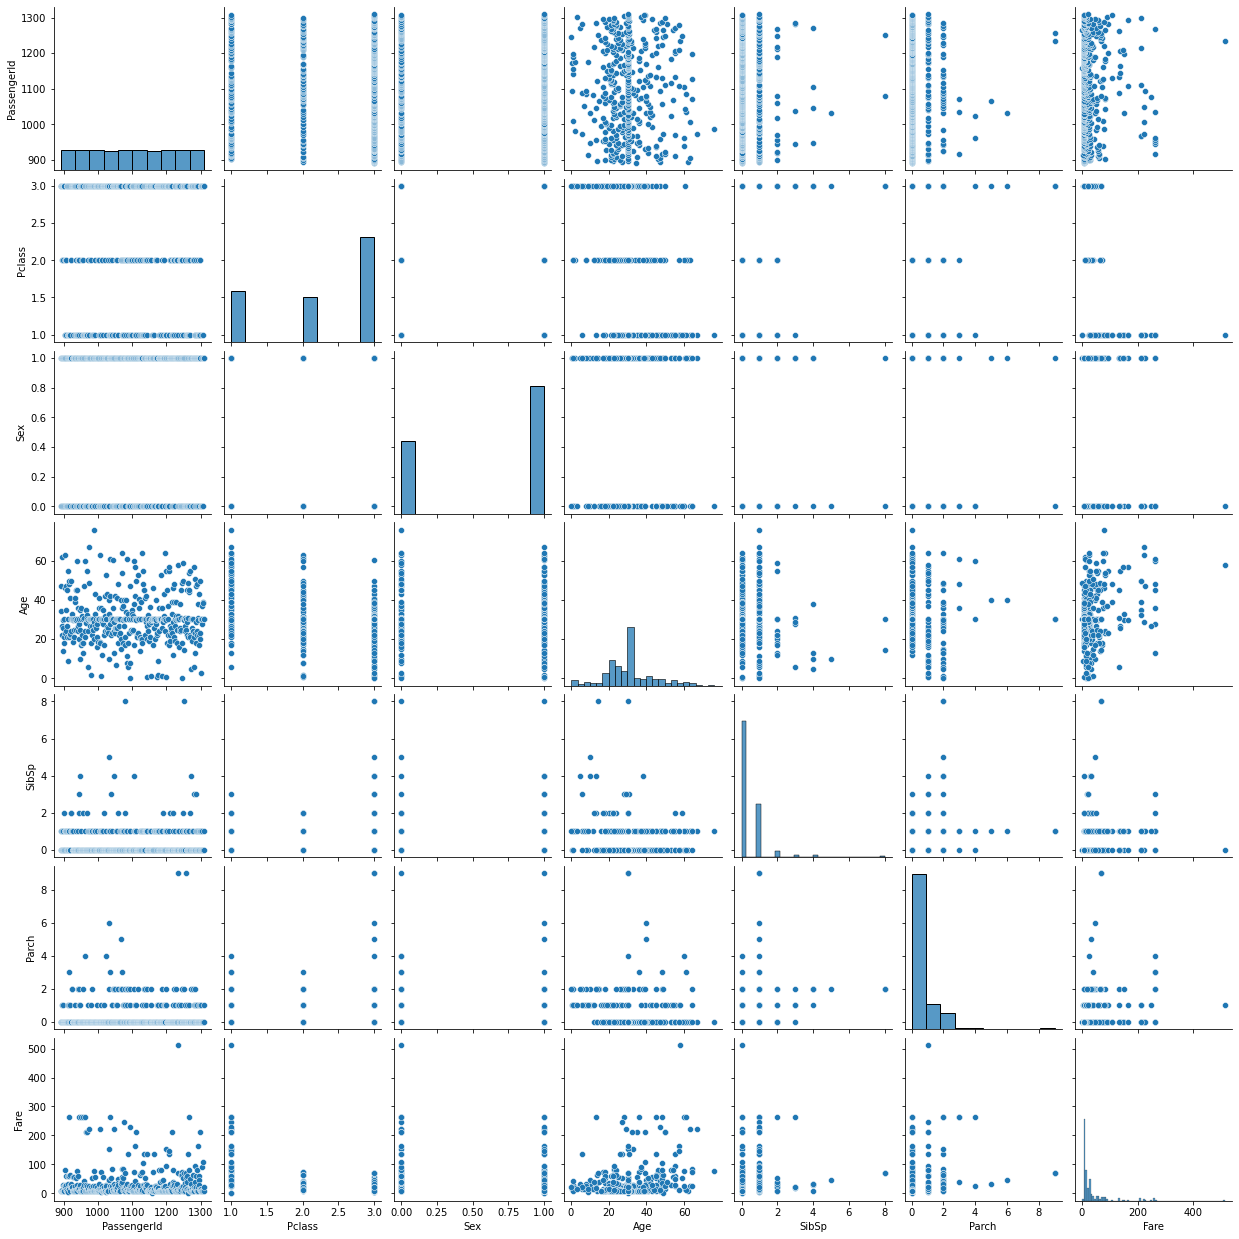

In [141]:
sns.pairplot(df1)

<AxesSubplot:>

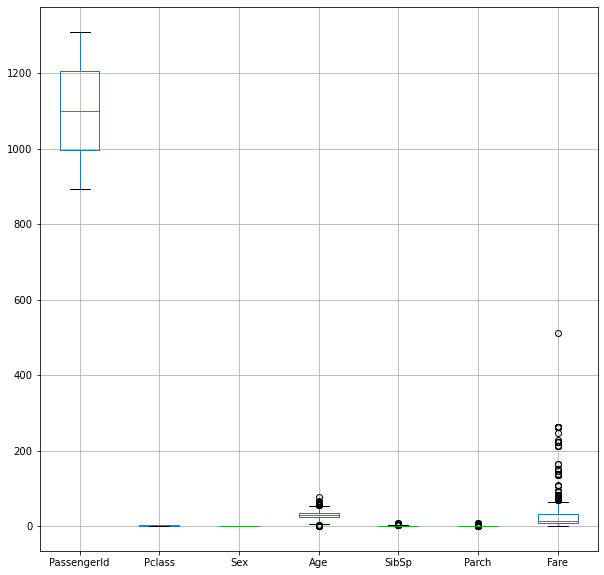

In [143]:
df1.boxplot(figsize=(10,10))

<AxesSubplot:xlabel='Age', ylabel='Count'>

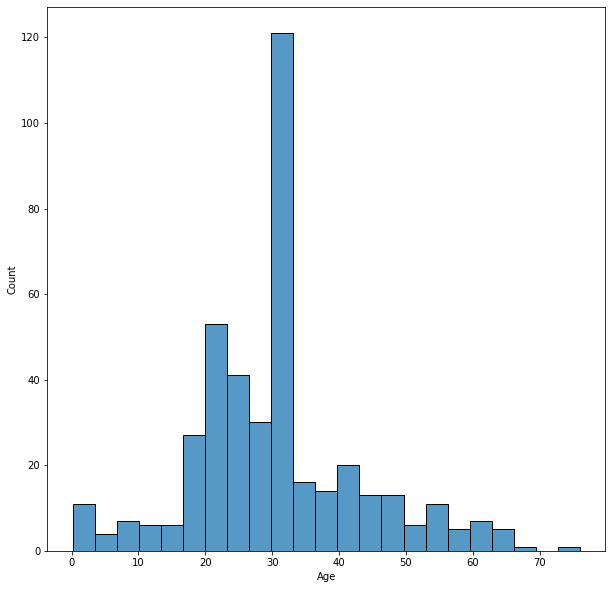

In [146]:
plt.figure(figsize=(10,10))
sns.histplot(df1['Age'])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

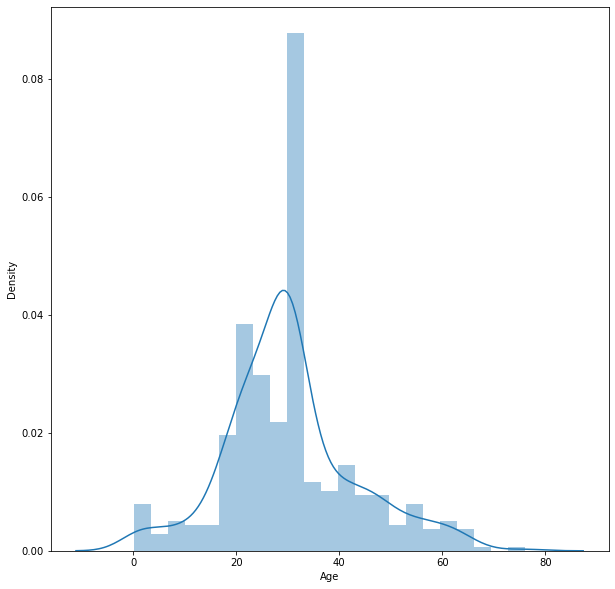

In [147]:
plt.figure(figsize=(10,10))
sns.distplot(df1['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16453c65dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x16453c713a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16453c65af0>],
 'medians': [<matplotlib.lines.Line2D at 0x16453c718e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16453c71bb0>],
 'means': []}

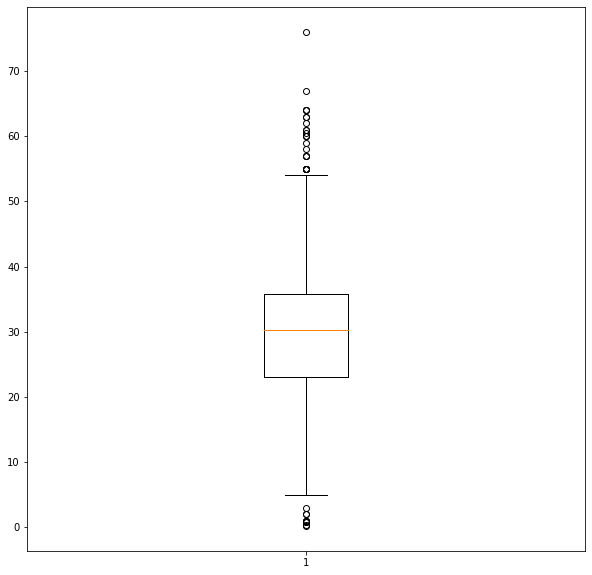

In [151]:
plt.figure(figsize=(10,10))
plt.boxplot(df1['Age'])

In [152]:
Q1=df1['Age'].quantile(0.25)
Q1

23.0

In [153]:
Q3=df1['Age'].quantile(0.75)
Q3

35.75

In [154]:
IQR=Q3-Q1
IQR

12.75

In [155]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [156]:
outliers=df1[(df1.Age<lower) | (df1.Age>upper)]
outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,2,"Myles, Mr. Thomas Francis",1,62.00,0,0,240276,9.6875,P2605,Q
13,905,2,"Howard, Mr. Benjamin",1,63.00,1,0,24065,26.0000,P2605,S
20,912,1,"Rothschild, Mr. Martin",1,55.00,1,0,PC 17603,59.4000,P2605,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",0,60.00,0,0,11813,76.2917,D15,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",0,60.00,1,4,19950,263.0000,C23 C25 C27,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",0,55.00,2,0,11770,25.7000,C101,S
81,973,1,"Straus, Mr. Isidor",1,67.00,1,0,PC 17483,221.7792,C55 C57,S
89,981,2,"Wells, Master. Ralph Lester",1,2.00,1,1,29103,23.0000,P2605,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,76.00,1,0,19877,78.8500,C46,S
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",0,63.00,1,0,PC 17483,221.7792,C55 C57,S


<AxesSubplot:>

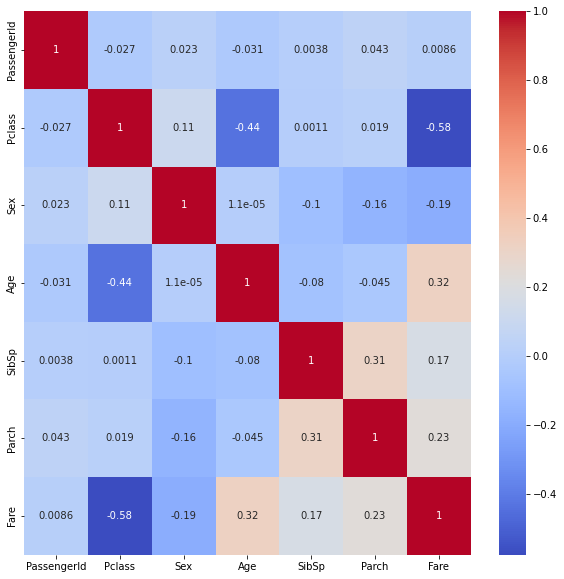

In [159]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')